In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [116]:
# Run Notebook from Jupyter Lab in a web browser where execution is fast
# CSV files are read with relative file paths

deck_df = pd.read_csv('deck.csv')
hand_df = pd.read_csv('hand.csv')

In [117]:
hand = list(hand_df['Points'].to_numpy())

# Turn soft aces to hard aces
while hand_sum > 21 and 11 in hand:
    ace_index = hand.index(11)
    hand[ace_index] = 1

hand_sum = sum(hand)

deck_sum = deck_df['Points'].count()

def count_points(point):
    if point == 1:
        return int(deck_df[deck_df['Points'] == 11].count())
    return int(deck_df[deck_df['Points'] == point].count())

points_dict = {hand_sum + i:count_points(i) / deck_sum for i in range(1, 12)}

x_points = points_dict.keys()
y_probabilities = points_dict.values()

In [118]:
if int(hand_df['Points'].count()) == 2:
    # When there are two cards in the hand.csv
    # write the probability of scoring 21 in the next hit to 21s.csv
    with open('21s.csv', 'w') as file:
        file.write('Probabilities\n')
        if 21 in points_dict:
            file.write(str(points_dict[21]) + '\n')
        else:
            file.write(str(0) + '\n')
else:
    # Otherwise there are more than two cards in the hand.csv
    # so append the probability of scoring 21 in the next hit to 21s.csv
    with open('21s.csv', 'a') as file:
        if 21 in points_dict:
            file.write(str(points_dict[21]) + '\n')
        else:
            file.write(str(0) + '\n')

# Get table of probabilities of scoring 21 in the next hit given a number of hits
# Graph the probabilities
df_21s = pd.read_csv('21s.csv')
x_hits = range(int(hand_df['Points'].count() - 1))
T21_probabilities = df_21s['Probabilities']

In [119]:
bust = safe = blackjack = 0
for card in deck_df['Points']:
    if card == 11:
        card = 1
    if hand_sum + card > 21:
        bust += 1
    elif hand_sum + card == 21:
        blackjack += 1
    else:
        safe += 1

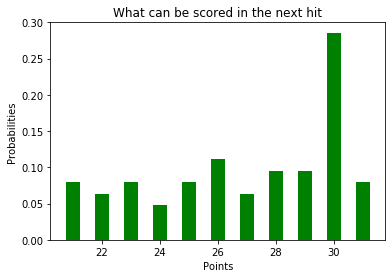

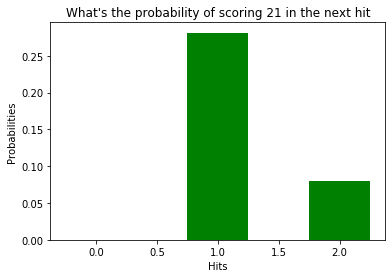

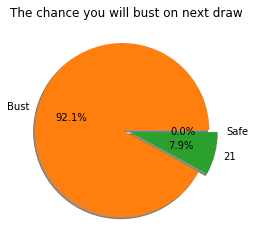

In [120]:
# %matplotlib inline
# plt.subplot(131)
plt.tight_layout()
plt.bar(x_points, y_probabilities, width=0.5, bottom=None, align='center', color='green')
plt.xlabel('Points')
plt.ylabel('Probabilities')
plt.title('What can be scored in the next hit')
plt.show()
# plt.subplot(132)

if len(x_hits) == len(T21_probabilities):
    plt.bar(x_hits, T21_probabilities, width=0.5, bottom=None, align='center', color='green')
    plt.xlabel('Hits')
    plt.ylabel('Probabilities')
    plt.title('What\'s the probability of scoring 21 in the next hit')
    plt.show()

# plt.subplot(133)
labels = ['Safe','Bust','21']
explode = (0.05,0.05,0.05)
plt.pie((safe,bust, blackjack), labels = labels, autopct='%1.1f%%',shadow=True, explode = explode)
plt.title('The chance you will bust on next draw')

plt.show()